# Potential SNIa Menagerie

Author: Melissa Graham

Identify potential SN Ia from the "probably-real" candidates.

In [1]:
# import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

In [2]:
### Colors to use for COSMOS-g, -r, -i and ELAIS-g, -r, -i
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','*']
all_fsizes  = [5, 5, 7]

## Load the candidate lightcurves

In [3]:
fnm = '../candidate_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
candLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
candLC_caldate = np.loadtxt( fnm, dtype='str', usecols=(2) )
candLC_mjd = np.loadtxt( fnm, dtype='float', usecols=(3) )
candLC_filter = np.loadtxt( fnm, dtype='str', usecols=(4) )
candLC_Nobj = np.loadtxt( fnm, dtype='int', usecols=(5) )
candLC_mag = np.loadtxt( fnm, dtype='float', usecols=(6) )
candLC_mage = np.loadtxt( fnm, dtype='float', usecols=(7) )
candLC_mrb = np.loadtxt( fnm, dtype='float', usecols=(8) )
candLC_maglim = np.loadtxt( fnm, dtype='float', usecols=(9) )

del fnm

## Load the lightcurve parameters data

In [4]:
fnm = '../candidate_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

## Load the polygons data

Type Ia SNe occupy a certain region in the parameter space of time span _vs._ amplitude.

MLG derived polygons in this region of parameter space separately, and we read them in now.

In [5]:
fnm = 'MLG_snia_menagerie_files/MLG_polygons_tspan_lcamp.dat'
poly_tspans = np.loadtxt( fnm, dtype='float', usecols=(0) )
poly_lcamps = np.loadtxt( fnm, dtype='float', usecols=(1,2,3,4,5,6), unpack=True)

## Use polygons to identify potential SNe Ia

We end up using just a single line in the amplitude _vs._ time span plane. It's the dashed line in the plots below.

For the dashed lines in the plots below.
filter slope  y-int 
g       0.050 -1.500
r       0.037 -1.125
i       0.037 -1.500
 
Number of potential sneia in COSMOS:  12
Number of potential sneia in ELAIS:  9


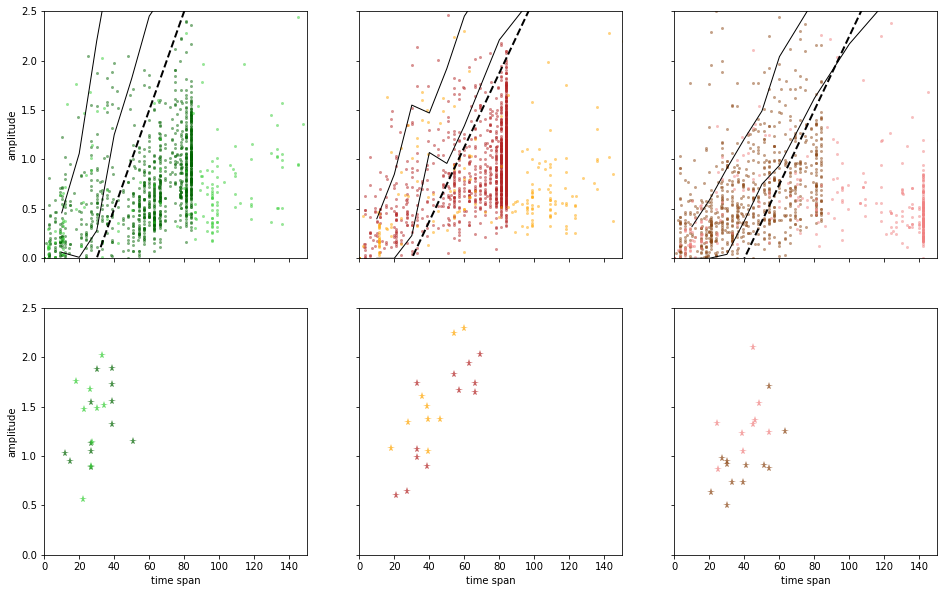

In [6]:
fig, ax = plt.subplots( 2, 3, figsize=(16,10), sharex=True, sharey=True )

### plot all the candidates in parameter space of timespan vs amplitude
tx = np.where( (paramLC_field == 'COSMOS') & (paramLC_tspan > 10) & (paramLC_amp > 0.5) & (paramLC_neps > 5) )[0]
ax[0,0].plot( paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[0] )
ax[0,1].plot( paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[1] )
ax[0,2].plot( paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[2] )
del tx
tx = np.where( (paramLC_field == 'ELAIS') & (paramLC_tspan > 10) & (paramLC_amp > 0.5) & (paramLC_neps > 5) )[0]
ax[0,0].plot( paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[3] )
ax[0,1].plot( paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[4] )
ax[0,2].plot( paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[5] )
del tx

### plot the polygon ranges from template light curves
for a in range(3):
    i = a * 2
    j = (a * 2) + 1
    x = poly_tspans[:]
    y1 = poly_lcamps[i,:]
    y2 = poly_lcamps[j,:]
    ax[0,a].plot( x, y1, lw=1, color='black')
    ax[0,a].plot( x, y2, lw=1, color='black')

### define a slightly more relaxed and easier cut, and apply it 
x = poly_tspans[:]
slopes = np.asarray([2.0/40, 1.5/40, 1.5/40],dtype='float')
yints  = np.asarray([2.0-slopes[0]*70, 1.5-slopes[1]*70, 1.5-slopes[2]*80],dtype='float')
for f in range(3):
    y = slopes[f]*x + yints[f]
    ax[0,f].plot( x, y, lw=2, ls='dashed', color='black')
del x, y

print('For the dashed lines in the plots below.')
print('%-6s %-6s %-6s' % ('filter','slope','y-int'))
print('%-6s %6.3f %6.3f' % ('g',slopes[0],yints[0]))
print('%-6s %6.3f %6.3f' % ('r',slopes[1],yints[1]))
print('%-6s %6.3f %6.3f' % ('i',slopes[2],yints[2]))

### create an array for flagging potential SNIa (1 = yes)
paramLC_potSNIa = np.zeros( len(paramLC_field), dtype='int' )

tx = np.where( (paramLC_tspan > 10) & (paramLC_amp > 0.5) & (paramLC_neps > 5) )[0]
for t in tx:
    cntr = 0
    glow = slopes[0]*paramLC_tspan_g[t] + yints[0]
    rlow = slopes[1]*paramLC_tspan_r[t] + yints[1]
    ilow = slopes[2]*paramLC_tspan_i[t] + yints[2]
    if (glow < paramLC_amp_g[t]) & (paramLC_amp_g[t]>0.5) & (paramLC_tspan_g[t]>10):
        cntr += 1
    if (rlow < paramLC_amp_r[t]) & (paramLC_amp_r[t]>0.5) & (paramLC_tspan_r[t]>10):
        cntr += 1
    if (ilow < paramLC_amp_i[t]) & (paramLC_amp_i[t]>0.5) & (paramLC_tspan_i[t]>10):
        cntr += 1
    if cntr == 3:
        paramLC_potSNIa[t] = 1
    del glow,rlow,ilow,cntr
del tx, slopes, yints

print(' ')
### overplot the potential SNeIa
tx = np.where( (paramLC_potSNIa == 1) & (paramLC_field == 'COSMOS') )[0]
print('Number of potential sneia in COSMOS: ',len(tx))
ax[1,0].plot( paramLC_tspan_g[tx], paramLC_amp_g[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[0] )
ax[1,1].plot( paramLC_tspan_r[tx], paramLC_amp_r[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[1] )
ax[1,2].plot( paramLC_tspan_i[tx], paramLC_amp_i[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[2] )
del tx
tx = np.where( (paramLC_potSNIa == 1) & (paramLC_field == 'ELAIS') )[0]
print('Number of potential sneia in ELAIS: ',len(tx))
ax[1,0].plot( paramLC_tspan_g[tx], paramLC_amp_g[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[3] )
ax[1,1].plot( paramLC_tspan_r[tx], paramLC_amp_r[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[4] )
ax[1,2].plot( paramLC_tspan_i[tx], paramLC_amp_i[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[5] )
del tx

### finish up the plot and show it
ax[0,0].set_xlim([0,150])
ax[0,1].set_xlim([0,150])
ax[0,2].set_xlim([0,150])
ax[0,0].set_ylim([0.,2.5])
ax[0,1].set_ylim([0.,2.5])
ax[0,2].set_ylim([0.,2.5])
ax[0,0].set_ylabel('amplitude')
ax[1,0].set_ylabel('amplitude')
ax[1,0].set_xlabel('time span')
ax[1,1].set_xlabel('time span')
ax[1,2].set_xlabel('time span')
plt.show()

### Plot the potential-SNIa menagerie

21


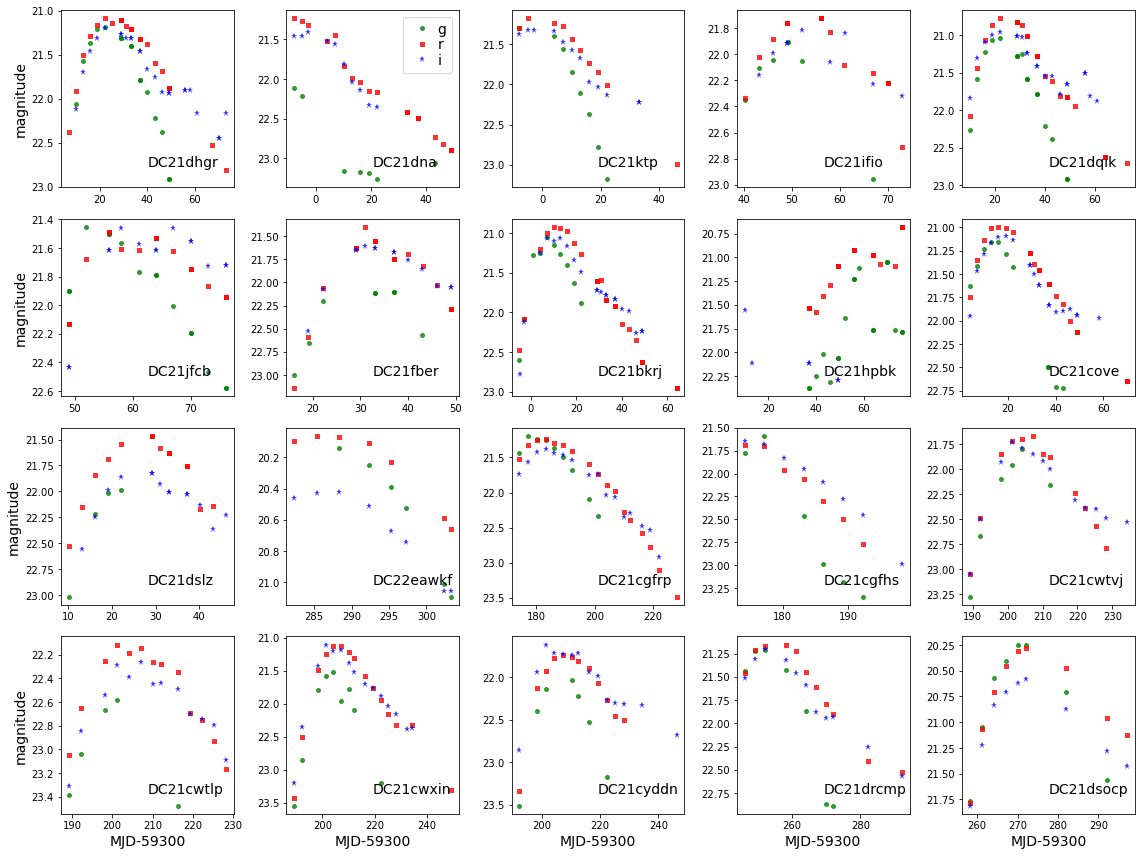

In [7]:
tx = np.where( paramLC_potSNIa == 1 )[0]
print(len(tx))

# fig, ax = plt.subplots( 5, 5, figsize=(16,16), sharex=False, sharey=False )
fig, ax = plt.subplots( 4, 5, figsize=(16,12), sharex=False, sharey=False )

t = 0
for i in range(4):
    ax[i,0].set_ylabel('magnitude', fontsize=14)
    for j in range(5):
        if t < len(tx):
            for f,filt in enumerate(all_filters):
                cx = np.where( (candLC_candid == paramLC_candid[tx[t]]) & (candLC_filter == filt) )[0]
                ax[i,j].plot( candLC_mjd[cx]-59300, candLC_mag[cx], 
                             all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt )
                del cx
            ax[i,j].invert_yaxis()
            ax[i,j].text(0.50, 0.10, paramLC_candid[tx[t]], fontsize=14, color='black', 
                         verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
            t += 1
        else:
            print(i,j,' no data')

ax[0,1].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(5):
    ax[3,j].set_xlabel('MJD-59300', fontsize=14)

plt.tight_layout()
plt.savefig('MLG_snia_menagerie_files/MLG_snia_menagerie')
plt.show()
del tx,t